In [82]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import random
import seaborn as sns
from scipy.spatial import distance
%cd /Users/twood/Desktop/DLBCL-Classifier
import src_python.format_data as fd
%cd /Users/twood/Desktop/DLBCL-Classifier/src_python

seed = 1234
random.seed(seed)
np.random.seed(seed)

/Users/twood/Desktop/DLBCL-Classifier
/Users/twood/Desktop/DLBCL-Classifier/src_python


In [83]:
pallet = {'C1': sns.color_palette()[4],        # purple, C1
          'C2': sns.color_palette()[9],        # blue, C2
          'C3': sns.color_palette()[1],        # orange, C3
          'C4': sns.color_palette()[2],        # green, C4
          'C5': sns.color_palette()[3],        # red, C5
          }

In [84]:
umap = pd.read_csv('../data_tables/umap/umap_70conf.tsv', sep='\t', index_col=0)
preds = "../evaluation_validation_set/confidence_adjusted_tables/NN_reducedV3.4_removeN5_nfeatures21_pMax0.93856484.tsv"
preds_test = '../evaluation_test_set/NN_reducedV3.4_removeN5_nfeatures21_testsetEval.tsv'
gsm_file = '../data_tables/gsm/DLBCL.699.fullGSM.Sep_23_2022.tsv'
training_set = list(pd.read_csv('../data_tables/train_test_sets/TrainingSet_550Subset_May2021.txt', sep='\t', header=None, index_col=0).index)
testing_set = list(pd.read_csv('../data_tables/train_test_sets/TestingSet_149Subset_May2021.txt', sep='\t', header=None, index_col=0).index)
sig_genes_file = '../data_tables/qval_dfs/fisher_exact_5x2.Sep_23_2022.combined.tsv'
set_file = '../data_tables/sample_sets/ShippStaudtSets.purity0.2.txt'

preds = pd.read_csv(preds, index_col=0, sep='\t')
preds.columns = ['C1', 'C2', 'C3', 'C4', 'C5']
preds_test = pd.read_csv(preds_test, index_col=0, sep='\t')
preds['Confidence'] = preds.max(axis=1)
confidences = pd.concat([preds_test['Confidence'], preds['Confidence']])
confidences = confidences.loc[umap.index]
c = ['C1', 'C2', 'C3', 'C4', 'C5', 'Confidence']
all_preds = pd.concat([preds[c], preds_test[c]])
all_preds['cluster'] = all_preds.iloc[:,0:5].idxmax(axis=1)

sample_cohorts = pd.read_csv(set_file, sep='\t', index_col=0)

gsm = pd.read_csv(gsm_file, sep='\t', index_col=0).T
sig_genes = pd.read_csv(sig_genes_file, sep='\t', index_col=0)
sig_genes = sig_genes.loc[sig_genes['q'] <= 0.10].index

gsm_b = gsm[sig_genes].astype(float).astype(int) != 0
gsm_b['COO'] = gsm['COO']
gsm_b['PLOIDY'] = gsm['PLOIDY'].astype(float).round(2)

gsm_b = gsm_b.loc[umap.index]

full_df = pd.concat([umap, gsm_b], axis=1)

full_df['set'] = 'Train'
full_df.loc[full_df.index.isin(testing_set), 'set'] = 'Test'

full_df['cohort'] = sample_cohorts.loc[full_df.index, 'cohort']
full_df['Confidence'] = confidences
reduced_df = fd.construct_reduced_winning_version(gsm)
reduced_df = reduced_df.loc[full_df.index]

In [85]:
c1s = all_preds.loc[(all_preds['cluster'] == 'C1') & (all_preds.index.isin(full_df.index))].index
c2s = all_preds.loc[(all_preds['cluster'] == 'C2') & (all_preds.index.isin(full_df.index))].index
c3s = all_preds.loc[(all_preds['cluster'] == 'C3') & (all_preds.index.isin(full_df.index))].index
c4s = all_preds.loc[(all_preds['cluster'] == 'C4') & (all_preds.index.isin(full_df.index))].index
c5s = all_preds.loc[(all_preds['cluster'] == 'C5') & (all_preds.index.isin(full_df.index))].index

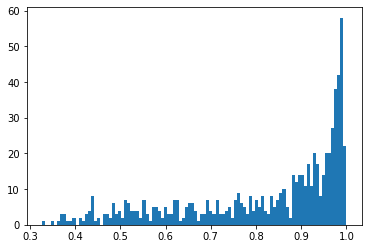

In [127]:
plt.hist(all_preds['Confidence'], bins=100)
plt.show()

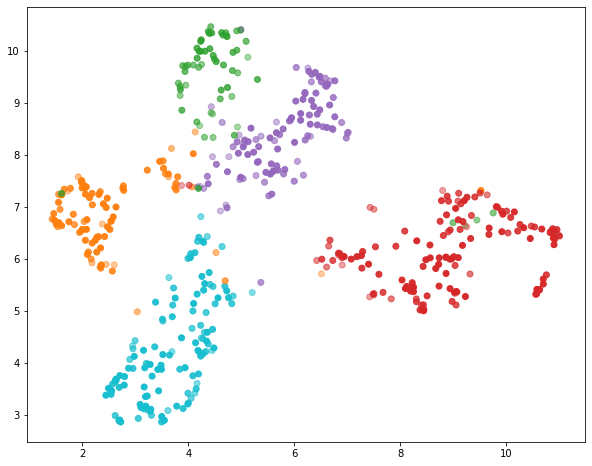

In [128]:
plt.figure(figsize=(10, 8))
plt.scatter(full_df.loc[c1s, 'u1'], full_df.loc[c1s, 'u2'], color=pallet['C1'], alpha=(all_preds.loc[c1s, 'Confidence'] - 1/2) * 2)
plt.scatter(full_df.loc[c2s, 'u1'], full_df.loc[c2s, 'u2'], color=pallet['C2'], alpha=(all_preds.loc[c2s, 'Confidence'] - 1/2) * 2)
plt.scatter(full_df.loc[c3s, 'u1'], full_df.loc[c3s, 'u2'], color=pallet['C3'], alpha=(all_preds.loc[c3s, 'Confidence'] - 1/2) * 2)
plt.scatter(full_df.loc[c4s, 'u1'], full_df.loc[c4s, 'u2'], color=pallet['C4'], alpha=(all_preds.loc[c4s, 'Confidence'] - 1/2) * 2)
plt.scatter(full_df.loc[c5s, 'u1'], full_df.loc[c5s, 'u2'], color=pallet['C5'], alpha=(all_preds.loc[c5s, 'Confidence'] - 1/2) * 2)
plt.show()

In [87]:
c1s

Index(['DLBCL10914', 'DLBCL_LS951', 'DLBCL_MAYO_DLBCL_3653', 'DLBCL11539',
       'DLBCL_RICOVER_1045', 'DLBCL11481', 'DLBCL11662', 'DLBCL11461',
       'DLBCL11429', 'DLBCL11537',
       ...
       'DLBCL_RICOVER_181', 'DLBCL10545', 'DLBCL_LS2978', 'DLBCL_RICOVER_865',
       'DLBCL_C_D_1107_NULLPAIR', 'DLBCL_C_D_1155_NULLPAIR',
       'DLBCL_RICOVER_694', 'DLBCL_RICOVER_1144', 'DLBCL_RICOVER_290',
       'DLBCL11508'],
      dtype='object', length=106)

In [88]:
sample_distances = {x: [] for x in full_df.index}
c_samples = [c1s, c2s, c3s, c4s, c5s]

for c in c_samples:
    for s1 in c:
        for s2 in c:
            if s1 == s2:
                continue
                
            d = distance.euclidean(full_df.loc[s1, ['u1', 'u2']], full_df.loc[s2, ['u1', 'u2']])
            sample_distances[s1].append(d)
            



In [89]:
sample_distances_means = {x: np.mean(sample_distances[x]) for x in sample_distances.keys()}
sample_distances_means

{'DLBCL10858': 2.2956475025596688,
 'DLBCL10878': 2.0290473831537352,
 'DLBCL10894': 1.0971198446234651,
 'DLBCL_C_D_1159_NULLPAIR': 1.6886307967566772,
 'DLBCL10846': 2.0774590831162554,
 'DLBCL10914': 1.962109240087694,
 'DLBCL10891': 1.784184389688067,
 'DLBCL11479': 2.365142637101969,
 'DLBCL_LS951': 1.274124002055166,
 'DLBCL_RICOVER_478': 1.3152343450186312,
 'DLBCL10981': 1.3170991323699526,
 'DLBCL_MAYO_DLBCL_3653': 1.386124084133122,
 'DLBCL10833': 1.951776098163373,
 'DLBCL_RICOVER_985': 1.350003389692487,
 'DLBCL_MC_F606_DMJ': 1.3382122348413097,
 'DLBCL10868': 6.893076498614669,
 'DLBC_FF_8046_TP_NB': 1.723143384565717,
 'DLBCL10456': 1.4811594114293172,
 'DLBCL_RICOVER_1046': 1.4645705626434602,
 'DLBCL11539': 1.0393154286181439,
 'DLBCL10536': 2.4554094996636056,
 'DLBCL_MC_F815_BAT': 1.4583978760553449,
 'DLBCL10521': 1.6055809648754633,
 'DLBCL10547': 1.3696681553124848,
 'DLBCL_LS1395': 1.2907891982932989,
 'DLBCL10879': 7.003839698244255,
 'DLBCL10836': 2.235232798479

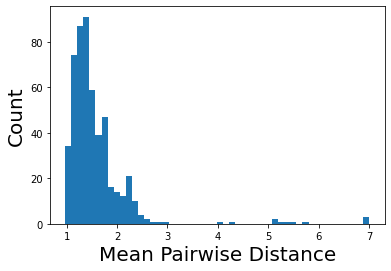

In [90]:
plt.hist(sample_distances_means.values(), bins=50)
plt.xlabel('Mean Pairwise Distance', size=20)
plt.ylabel('Count', size=20)
plt.show()

In [91]:
outliers = [x for x in sample_distances_means if sample_distances_means[x] > 3]
c1_o = [x for x in outliers if x in c1s]
c2_o = [x for x in outliers if x in c2s]
c3_o = [x for x in outliers if x in c3s]
c4_o = [x for x in outliers if x in c4s]
c5_o = [x for x in outliers if x in c5s]
print(outliers)

['DLBCL10868', 'DLBCL10879', 'DLBCL11515', 'DLBCL_LS762', 'DLBCL_RICOVER_274', 'DLBCL11447', 'DLBCL10863', 'DLBCL11675', 'DLBCL_RICOVER_1204', 'DLBCL_LS148', 'DLBCL10476']


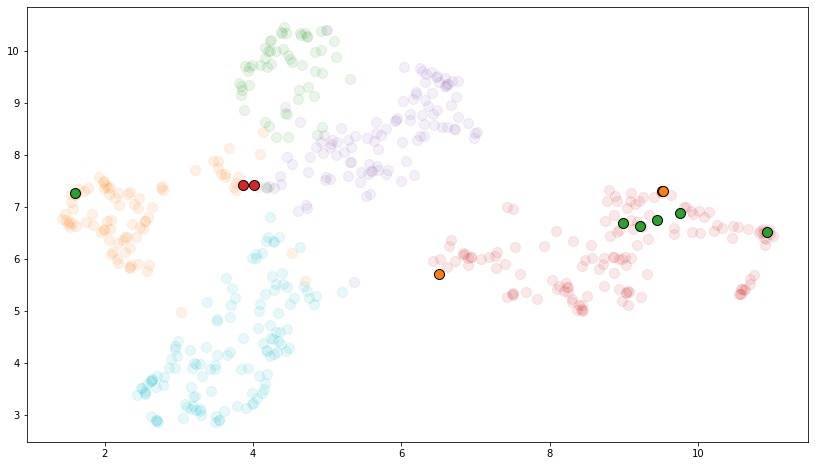

In [92]:
plt.figure(figsize=(14, 8))
plt.scatter(full_df.loc[c1s, 'u1'], full_df.loc[c1s, 'u2'], color=pallet['C1'], alpha=0.1, s=100)
plt.scatter(full_df.loc[c2s, 'u1'], full_df.loc[c2s, 'u2'], color=pallet['C2'], alpha=0.1, s=100)
plt.scatter(full_df.loc[c3s, 'u1'], full_df.loc[c3s, 'u2'], color=pallet['C3'], alpha=0.1, s=100)
plt.scatter(full_df.loc[c4s, 'u1'], full_df.loc[c4s, 'u2'], color=pallet['C4'], alpha=0.1, s=100)
plt.scatter(full_df.loc[c5s, 'u1'], full_df.loc[c5s, 'u2'], color=pallet['C5'], alpha=0.1, s=100)
plt.scatter(full_df.loc[c1_o, 'u1'], full_df.loc[c1_o, 'u2'], facecolors=pallet['C1'], edgecolors='black', s=100)
plt.scatter(full_df.loc[c2_o, 'u1'], full_df.loc[c2_o, 'u2'], facecolors=pallet['C2'], edgecolors='black', s=100)
plt.scatter(full_df.loc[c3_o, 'u1'], full_df.loc[c3_o, 'u2'], facecolors=pallet['C3'], edgecolors='black', s=100)
plt.scatter(full_df.loc[c4_o, 'u1'], full_df.loc[c4_o, 'u2'], facecolors=pallet['C4'], edgecolors='black', s=100)
plt.scatter(full_df.loc[c5_o, 'u1'], full_df.loc[c5_o, 'u2'], facecolors=pallet['C5'], edgecolors='black', s=100)
plt.show()

In [96]:
c1_features = ['BCL6_ALT', 'NOTCH2_vec', 'M88O_vec', 'C1_vec4', 'CD70_vec']
c2_features = ['TP53_biallelic', 'X21Q_AMP', 'Sum_C2_ARM', 'Sum_C2_FOCAL']
c3_features = ['BCL2_combined', 'CREBBP_vec', 'GNA13_vec', 'PTEN', 'SV_MYC']
c4_features = ['Hist_comp', 'SGK1_vec', 'DUSP2_vec']
c5_features = ['TBL1XR1_vec', 'MYD88_L265P_CD79B', 'Sum_C5_CNA']

In [101]:
reduced_df.loc[c4_o, c4_features + c5_features]

,Hist_comp,SGK1_vec,DUSP2_vec,TBL1XR1_vec,MYD88_L265P_CD79B,Sum_C5_CNA
DLBCL10868,11,3,4,25,0,2
DLBCL_RICOVER_274,10,1,2,9,2,1
DLBCL11447,6,0,5,15,0,1
DLBCL10863,10,0,2,14,4,0
DLBCL_RICOVER_1204,8,0,4,11,2,4
DLBCL10476,6,8,2,4,0,2


In [102]:
reduced_df.loc[c4_o, c4_features + c3_features]

,Hist_comp,SGK1_vec,DUSP2_vec,BCL2_combined,CREBBP_vec,GNA13_vec,PTEN,SV_MYC
DLBCL10868,11,3,4,0,0,0,0,0
DLBCL_RICOVER_274,10,1,2,0,0,2,0,0
DLBCL11447,6,0,5,0,0,1,0,0
DLBCL10863,10,0,2,0,2,1,1,0
DLBCL_RICOVER_1204,8,0,4,0,2,3,1,0
DLBCL10476,6,8,2,5,0,5,1,0


In [106]:
reduced_df.loc[c3_o, c5_features + c3_features]

,TBL1XR1_vec,MYD88_L265P_CD79B,Sum_C5_CNA,BCL2_combined,CREBBP_vec,GNA13_vec,PTEN,SV_MYC
DLBCL10879,14,0,1,4,6,4,0,0
DLBCL11515,6,0,2,2,1,1,1,3
DLBCL11675,14,0,1,5,6,8,0,0


In [111]:
preds.loc[preds.index.isin(outliers)]

,C1,C2,C3,C4,C5,Confidence
DLBCL10868,0.065206,0.016862,0.026040,0.761106,0.130786,0.761106
DLBCL10879,0.012524,0.013439,0.867670,0.046649,0.059718,0.867670
DLBCL11515,0.021058,0.069540,0.702423,0.035610,0.171369,0.702423
DLBCL_LS762,0.022704,0.021296,0.108930,0.030140,0.816930,0.816930
DLBCL_RICOVER_274,0.050257,0.077086,0.027282,0.799567,0.045808,0.799567
DLBCL11447,0.052550,0.018151,0.028275,0.783957,0.117067,0.783957
DLBCL10863,0.107762,0.017702,0.028131,0.751721,0.094684,0.751721
DLBCL11675,0.022620,0.009237,0.814236,0.059363,0.094544,0.814236
DLBCL_RICOVER_1204,0.030325,0.037164,0.060965,0.712869,0.158676,0.712869


In [112]:
len(outliers)

11

In [110]:
preds_test.loc[preds_test.index.isin(outliers)]

,C1,C2,C3,C4,C5,Confidence,PredictedCluster,TrueCluster,Correctness
DLBCL_LS148,0.017832,0.072196,0.120485,0.081892,0.707595,0.707595,5.0,5,True
DLBCL10476,0.056636,0.015878,0.052758,0.858899,0.015829,0.858899,4.0,4,True
